<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">
            <tr>
                <td  style="border: none!important;">
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                <h1 align=center><font size=5 color="#045F5F"> <b>CA2</b><br><br>Alireza Karimi</i></font></h1>
                </td>
                <td style="border: none!important;">
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
            </tr>
        </table>

# <b><font color='green'>Part1:</font></b> Conditional Distribution

## **1_1:**

In this part, we just need to read the csv file, store it in a dataframe and then find the frequency of BRT and metro and show them through two histograms.

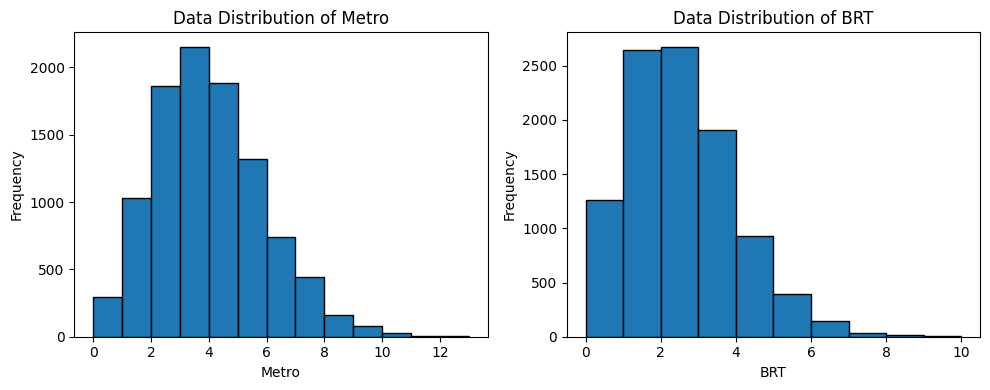

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Tarbiat.csv")
data_metro = df["metro"]
data_BRT = df["BRT"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.hist(data_metro, bins=len(data_metro.unique())-1, edgecolor='black')
ax1.set_xlabel('Metro')
ax1.set_ylabel('Frequency')
ax1.set_title('Data Distribution of Metro')

ax2.hist(data_BRT, bins=len(data_BRT.unique())-1, edgecolor='black')
ax2.set_xlabel('BRT')
ax2.set_ylabel('Frequency')
ax2.set_title('Data Distribution of BRT')

plt.tight_layout()

plt.show()

## **1_2:**

When we are discussing rare events occurring at a specific time or place, we typically utilize the Poisson distribution. To calculate the parameter lambda of the Poisson distribution, we have two main options: employing the mean or the variance of the data. For a more accurate approximation, we can consider the average of both measures. Therefore, the formulation becomes:

In [160]:
import numpy as np
metro_arr = np.array(data_metro)
BRT_arr = np.array(data_BRT)
print(f"Lambda approximation for metro by using the mean: {round(metro_arr.mean(),4)}")
print(f"Lambda approximation for metro by using the variance: {round(metro_arr.var(),4)}")
metro_lambda = round((metro_arr.mean() + metro_arr.var())/2,4)
print(f"Lambda approximation for metro by using both mean and variance: {metro_lambda}")
print(f"Lambda approximation for BRT by using the mean: {round(BRT_arr.mean(),4)}")
print(f"Lambda approximation for BRT by using the variance: {round(BRT_arr.var(),4)}")
BRT_lambda = round((BRT_arr.mean() + BRT_arr.var())/2,4)
print(f"Lambda approximation for BRT by using the mean and variance: {BRT_lambda}")

Lambda approximation for metro by using the mean: 3.5316
Lambda approximation for metro by using the variance: 3.6032
Lambda approximation for metro by using both mean and variance: 3.5674
Lambda approximation for BRT by using the mean: 2.0636
Lambda approximation for BRT by using the variance: 2.067
Lambda approximation for BRT by using the mean and variance: 2.0653


## **1_3:**

In this part, we just need to add "density = True" parameter to the hist.

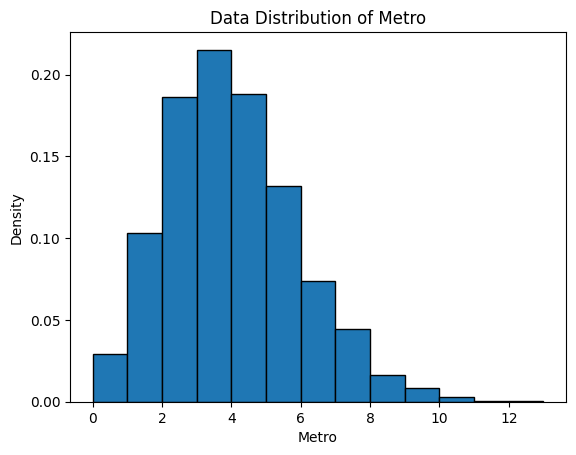

In [161]:
plt.hist(data_metro, bins=len(data_metro.unique())-1,density = True, edgecolor='black')
plt.xlabel('Metro')
plt.ylabel('Density')
plt.title('Data Distribution of Metro')

plt.show()

## **1_4:**

In this part we use The 'poisson.rvs' function which is a part of SciPy's statistical module and it is used to generate random numbers from a Poisson distribution.

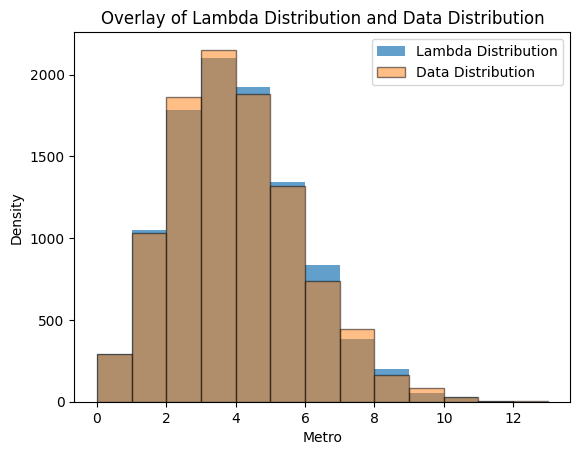

In [162]:
from scipy.stats import poisson

param = metro_lambda
samples = poisson.rvs(param, size=10000)

plt.hist(samples,np.arange(0,len(data_metro.unique())-1,1), alpha=0.7, label='Lambda Distribution')

plt.hist(data_metro, bins=len(data_metro.unique())-1, edgecolor='black',
         alpha=0.5, label='Data Distribution')

plt.xlabel('Metro')
plt.ylabel('Density')
plt.title('Overlay of Lambda Distribution and Data Distribution')
plt.legend()

plt.show()

## **1_5:**

Indeed, it is well-known that the sum of two independent Poisson distributions with parameters lambda1 and lambda2 follows a Poisson distribution with parameter lambda1 + lambda2. As you can observe, the two histograms are remarkably similar.

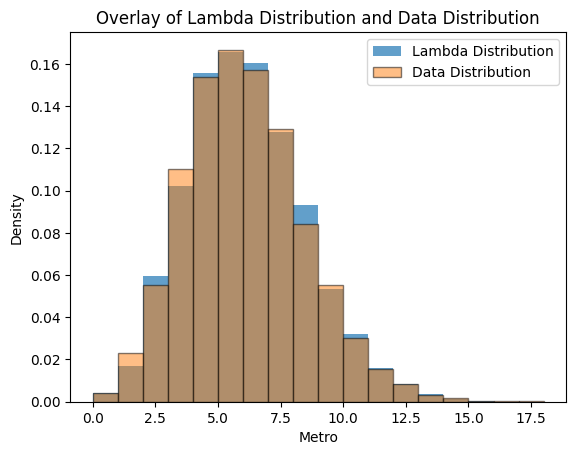

In [163]:
par = metro_lambda + BRT_lambda
samples = poisson.rvs(par, size=10000)

plt.hist(samples,np.arange(0,len(np.unique(samples))-1,1),density = True, alpha=0.7, label='Lambda Distribution')
all_arr = metro_arr+ BRT_arr

plt.hist(all_arr, bins=len(np.unique(all_arr))-1,density = True, edgecolor='black',alpha=0.5, label='Data Distribution')

plt.xlabel('Metro')
plt.ylabel('Density')
plt.title('Overlay of Lambda Distribution and Data Distribution')
plt.legend()

plt.show()

## **1_6:**

As it is in the slides, we have something like this:

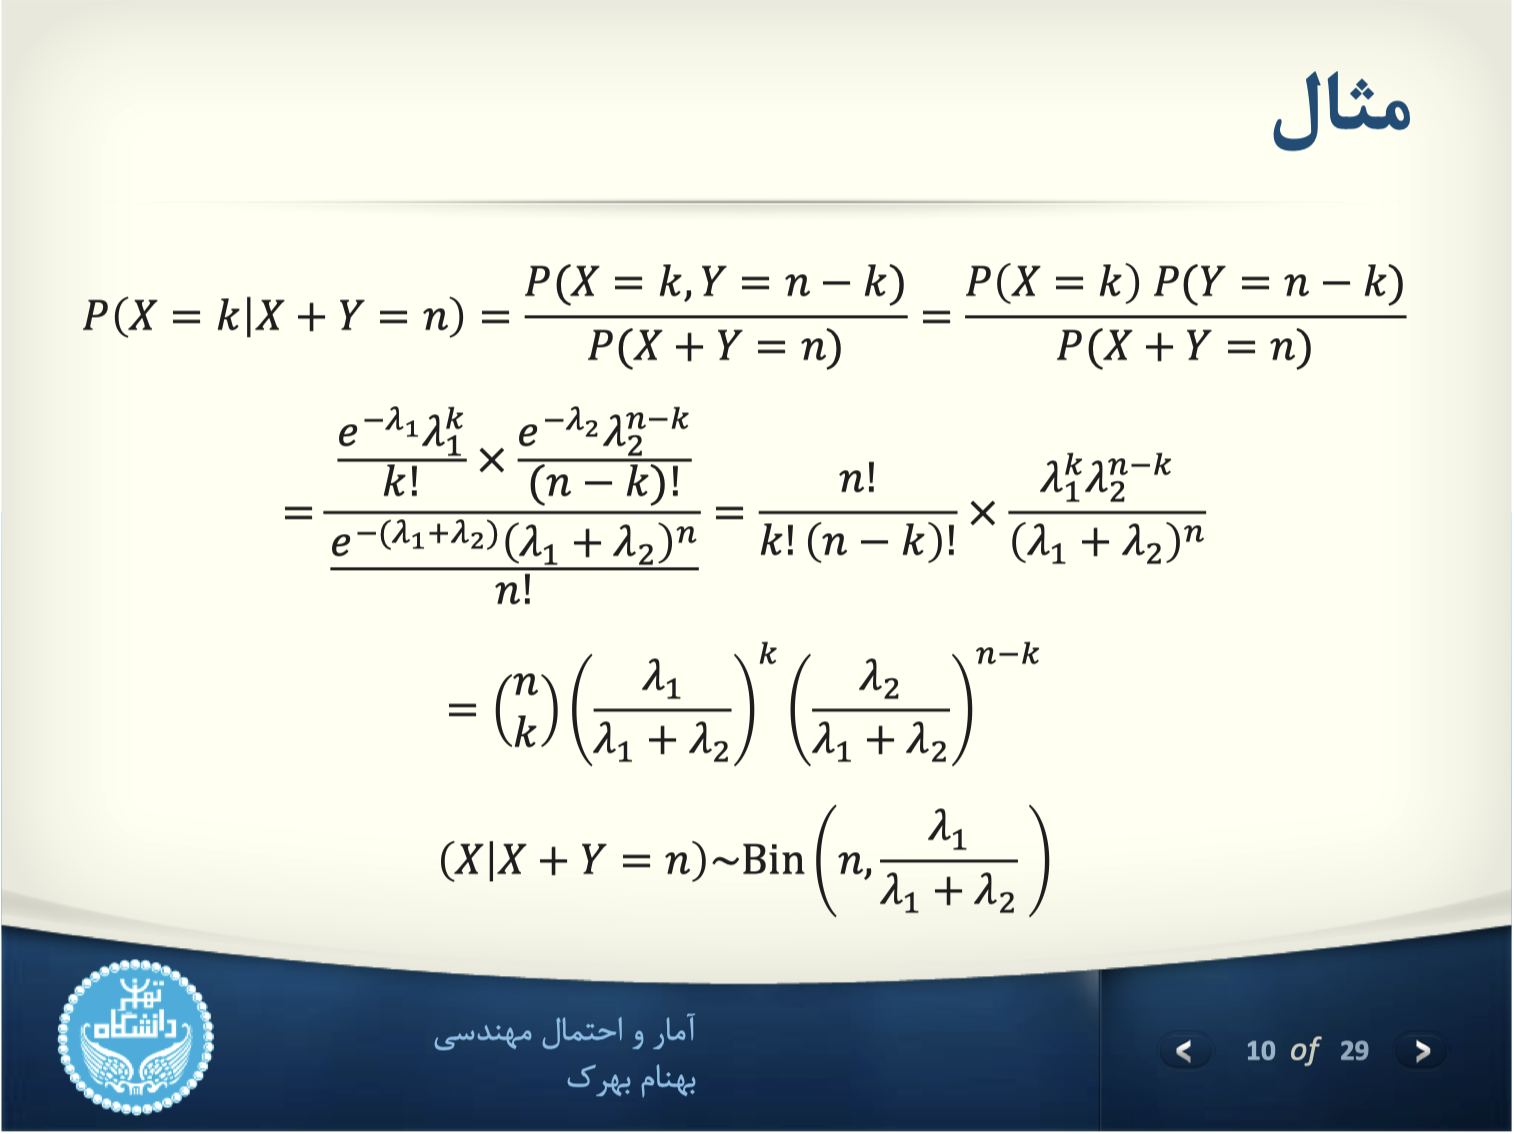

In [164]:
from IPython.display import Image

Image(filename ='pic.png')

## **1_7:**

In this section, we will present the binomial distribution obtained from section 1_6. To do this, we will generate some random data based on the binomial distribution using the function “binom.rvs()”.



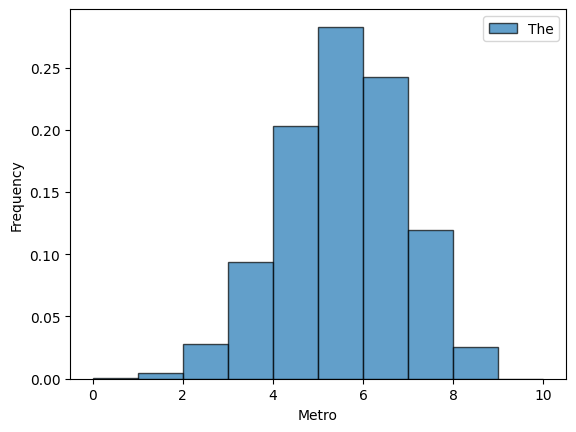

In [165]:
from scipy.stats import binom

p = metro_lambda/(BRT_lambda + metro_lambda)
W = binom.rvs(n = 8,p = p, size=100000)

plt.hist(W,np.arange(0,len(np.unique(W))+2,1),density = True,  edgecolor='black',alpha=0.7, label='The')

plt.xlabel('Metro')
plt.ylabel('Frequency')
plt.legend()

plt.show()

## **1_8:**

So in this part, we are using our samples(dataframe) to perform practical calculations.

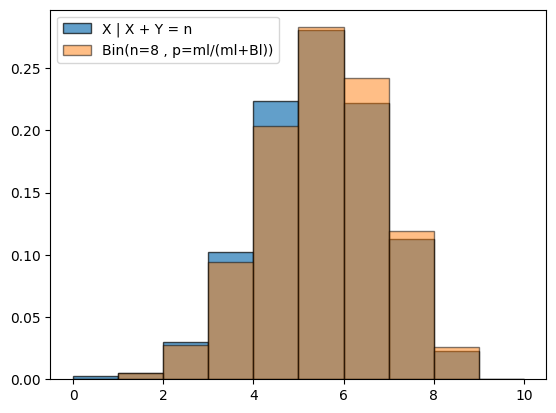

In [166]:
df["all"] = df["metro"] + df["BRT"]
n = 8
df = df[df['all'] == n]

metro_density = np.array(df["metro"])

plt.hist(metro_density,np.arange(0,len(np.unique(W))+2,1),np.arange(0,len(np.unique(W))+2,1), edgecolor='black',density = True, alpha=0.7, label="X | X + Y = n")
plt.hist(W,np.arange(0,len(np.unique(W))+2,1),density = True, edgecolor='black', alpha=0.5, label="Bin(n=8 , p=ml/(ml+Bl))")
plt.legend()
plt.show()

# <b><font color='green'>Part2:</font></b> MGF

## **2_1:**

So, I defined two functions. The first one is “coupon_collector()”, which calculates the coupon collector problem for the inputted n coupons. The second function, “calc_cc()” (cc is an abbreviation for coupon_collector), is used to perform that trial k times and find the mean of the answers.

In [167]:
import random

def coupon_collector(n):
  mark = [False] * n
  count = 0
  step = 0
  while(count != n):
    random_number = random.randint(0, n-1)
    if(mark[random_number]== False):
      mark[random_number] = True
      count+=1
    step +=1
  return step


def calc_cc(n, k):
  all_cc_trials = np.array([])
  for _ in range (k):
    all_cc_trials = np.append(all_cc_trials, coupon_collector(n))

  return np.mean(all_cc_trials)


## **2_2:**

As you can see in the outputs, if we increase ‘k’, the correctness of our answer will increase and it will gives us more precise answers.

In [168]:
n = 10
k = 1000
print(f" for n = {n} and k = {k} we will have: {calc_cc(n,k)}")
k = 100
print(f" for n = {n} and k = {k} we will have: {calc_cc(n,k)}")
k = 10
print(f" for n = {n} and k = {k} we will have: {calc_cc(n,k)}")

 for n = 10 and k = 1000 we will have: 28.733
 for n = 10 and k = 100 we will have: 31.53
 for n = 10 and k = 10 we will have: 29.8


## **2_3:**

So, what we have done here is defining a list called $M()$ which stores the moment generating function (MGF) of each $x_i$. We know that every $x_i$ has a geometric distribution because it represents the number of trials needed to achieve the first success.

The coupon collector problem can be used to derive the probability of finding a new type of coupon. The chance of finding a new type of coupon is given by $\frac{n - i}{n}$, where $i$ starts from zero and goes up to $n-1$.

 Although all coupons have an equal probability of being seen for the first time (each with a probability of $\frac{1}{n}$), the probability of finding a "new" type of coupon is different and is calculated differently.

Since the $x_i$’s are geometrically distributed, the probability of $x_i$ being found at step $k$ is given by:
$$ P(x_i) =( \frac {n - i}{n})   (1 - \frac {n - i}{n})^{j-1} = ((\frac {n - i}{n}) ( \frac {i}{n})^{j-1} )  $$
So, for calculating the $M_{x_i}$, we have:
$$M{x_i} = E[e^{s{x_i}}] = \sum_{j=1} ^{∞} (e^{s{j}} P_{x_i}(j)) = \sum_{j = 1} ^{∞} (e^{s{j}} (\frac {n - i}{n}) ( \frac {i}{n})^{j-1} )$$


In [169]:
import sympy as sp

x, s, j = sp.symbols('x s j')
n = 10
symbols_list = ['x' + str(i) for i in range(1, n+1)]
x = sp.symbols(' '.join(symbols_list))

M = []
for i in range(n):
    M.append(sp.Sum(sp.exp(s * j) * ((n - i) / n) * (i / n) ** (j - 1), (j, 1, sp.oo)))

M[0] = sp.exp(s) # cuz we had 0 to the power of 0
for i in range(n):
  display(M[i])


exp(s)

Sum(0.9*0.1**(j - 1)*exp(j*s), (j, 1, oo))

Sum(0.8*0.2**(j - 1)*exp(j*s), (j, 1, oo))

Sum(0.7*0.3**(j - 1)*exp(j*s), (j, 1, oo))

Sum(0.6*0.4**(j - 1)*exp(j*s), (j, 1, oo))

Sum(0.5*0.5**(j - 1)*exp(j*s), (j, 1, oo))

Sum(0.4*0.6**(j - 1)*exp(j*s), (j, 1, oo))

Sum(0.3*0.7**(j - 1)*exp(j*s), (j, 1, oo))

Sum(0.2*0.8**(j - 1)*exp(j*s), (j, 1, oo))

Sum(0.1*0.9**(j - 1)*exp(j*s), (j, 1, oo))

## **2_4:**

We just need to multiply all of the $M_{x_i}$ to calculate the value of $M_x$.

In [170]:
MX = sp.prod(M)
display(MX)

exp(s)*Sum(0.9*0.1**(j - 1)*exp(j*s), (j, 1, oo))*Sum(0.8*0.2**(j - 1)*exp(j*s), (j, 1, oo))*Sum(0.7*0.3**(j - 1)*exp(j*s), (j, 1, oo))*Sum(0.6*0.4**(j - 1)*exp(j*s), (j, 1, oo))*Sum(0.5*0.5**(j - 1)*exp(j*s), (j, 1, oo))*Sum(0.4*0.6**(j - 1)*exp(j*s), (j, 1, oo))*Sum(0.3*0.7**(j - 1)*exp(j*s), (j, 1, oo))*Sum(0.2*0.8**(j - 1)*exp(j*s), (j, 1, oo))*Sum(0.1*0.9**(j - 1)*exp(j*s), (j, 1, oo))

## **2_5:**

To find the mean, we need to derive from the $M_x$ and substitute $s=0$ into it. To simplify the answer, we can use the function “doit()”.

In [171]:
deriv = sp.diff(MX, s)
mean = deriv.subs({s: 0})
print(mean.doit())

29.2896825396825


As you can see, the answer we get for the mean is almost the same as the answer we get from Section 2_2.

# <b><font color='green'>Part3:</font></b> Bayesian Estimation & Inference

---



## **3_1:**

So in this section, we just need to use the 'drop' method to remove the rows 200 and 201.

In [172]:
df = pd.read_csv("digits.csv")
number201 = df.iloc[200,df.columns!="label"]
number202 = df.iloc[201,df.columns!="label"]
df = df.drop([200,201])
display(df)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **3_2:**

 It is needless to say that we traverse all the data in our dataframe. For each data point, if it is less than or equal to 128, we assign it a value of 0. On the other hand, if it is greater than 128, we assign it a value of 1.

In [173]:
df.loc[:, df.columns != "label"] = df.loc[:, df.columns != "label"].apply(lambda x: x.apply(lambda y: 0 if y <= 128 else 1))
display(df)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **3_3:**

I used Numpy Arrays and Reshaping for Simplification and Exclude the ‘Label’ Column. I just find a random number between 200 numbers in df.

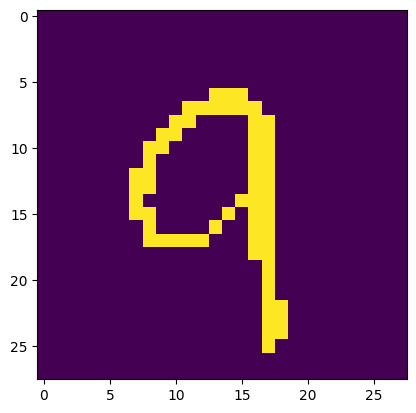

In [174]:
random_number = random.randint(0, len(df))
number = np.array(df.iloc[random_number, df.columns != "label"])
number = np.reshape(number, (28, 28))
plt.imshow(number)
plt.show()

## **3_4:**

I commented out this part of my code because it crashes the whole program. The reason for the crash is that we have a module called 'display' and we also have a function named 'display'. Therefore, if you want to verify that this part is also true, please uncomment the below code snippet after running all the cells.


In [175]:
# from scipy.stats import beta,bernoulli
# from time import sleep
# from IPython import display

# t = 1000
# p = np.linspace(0,1,t)
# fy = beta.pdf(p, a=1, b=1)

# def update(fy: np.array, n:bool) -> np.array:
#     p = np.linspace(0,1,t)
#     # calculate P(N = n| Y = p) which is a bernouli distribution
#     pny = p if n==1 else (1-p)
#     # calculate integral(0 -> 1) fy * pny
#     integral = np.sum(fy * pny) / t

#     post = fy * pny / integral
#     return post

# plt.figure(figsize=(10,8))
# for i in range(100):
#     # replace 'df' with your dataframe's name, this is just a suggestion, you do not have to code exactly like this
#     n =  df[df['label'] == 8].iloc[i, df.columns.get_loc('pixel404')]
#     fy = update(fy, n)

#     # dynamic plot
#     # do not change this part
#     plt.plot(p, fy, 'r', label='1')
#     plt.ylim(-1, 10)
#     plt.xlim(0, 1)
#     plt.text(0.1,9,f'number of seen data : {i + 1}, p = {fy.argmax() / t :.2f}', color='purple')
#     display.clear_output(wait=True)
#     display.display(plt.gcf())
#     plt.clf()
#     sleep(0.05)


## **3_5:**

In [ ]:
df8 = df[df['label'] == 8].iloc[1:].drop('label', axis=1)
df9 = df[df['label'] == 9].iloc[1:].drop('label', axis=1)
df8arr = df8.values
df8arr = np.sum(df8arr, axis=0) / df8arr.shape[0]
df9arr = df9.values
df9arr = np.sum(df9arr, axis=0) / df9arr.shape[0]
display(df8arr)
display(len(df8arr))
display(df9arr)
display(len(df9arr))

## **3_6:**

We have:
$$ P(X \vert \text{label}=8) = P(x_1 \vert \text{label} = 8) \times P(x_2 \vert \text{label} = 8) \times P(x_3 \vert \text{label} = 8) \times \ldots \times P(x_{783} \vert \text{label} = 8) $$
likewise:
$$ P(X \vert \text{label}=9) = P(x_1 \vert \text{label} = 9) \times P(x_2 \vert \text{label} = 9) \times P(x_3 \vert \text{label} = 9) \times \ldots \times P(x_{783} \vert \text{label} = 9) $$


Because there are 100 lines for label = 8 and 100 lines for label = 9, we have:

$$ P(\text{lable} = 8) = P(\text{lable} = 9) = \frac{1}{2} $$
So, we can instead calculate and compare:

$$P(label|X) = \frac{P(X|label)}{P(X|label=8) + P(X|label=9)}$$

In [177]:
def P_X_on_label(X, densityarr):
  res = 1
  for index in range(len(X)):
        if X[index] == 1:
            res *= densityarr[index]
        else:
            res *= 1-densityarr[index]
  return res

def P_label_on_X(number,dfarr):
    return P_X_on_label(number,dfarr) / (P_X_on_label(number,df8arr)+P_X_on_label(number,df9arr))

def find_label(number):
    return 8 if P_label_on_X(number,df8arr)>P_label_on_X(number,df9arr) else 9

number201 = number201.apply(lambda x: 0 if x <= 128 else 1)
number202 = number202.apply(lambda x: 0 if x <= 128 else 1)

print(f'For 201st number,the probability of being 8 is: {round(P_label_on_X(number201,df8arr),4)}\nAnd the probability of being 9 is: {round(P_label_on_X(number201,df9arr),4)}\nSo the number is: {find_label(number201)}\n')
print(f'For 202nd number,the probability of being 8 is: {round(P_label_on_X(number202,df8arr),4)}\nAnd the probability of being 9 is: {round(P_label_on_X(number202,df9arr),4)}\nSo the number is: {find_label(number202)}')

For 201st number,the probability of being 8 is: 0.9999
And the probability of being 9 is: 0.0001
So the number is: 8

For 202nd number,the probability of being 8 is: 0.0
And the probability of being 9 is: 1.0
So the number is: 9


Thanks for your attention.

My name is Alireza Karimi.

My SID is 810101492.

Hope you have a good day :)